Handling Missing numerical Data

1)Uni-variant Imputation
a) Mean/Median,
b) Arbitary,
c) End of distribution

2)Multi variant Imputation

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

In [2]:
df = pd.read_csv('titanic_toy.csv')

In [3]:
df.head()

,Age,Fare,Family,Survived
0,22.0,7.2500,1,0
1,38.0,71.2833,1,1
2,26.0,7.9250,0,1
3,35.0,53.1000,1,1
4,35.0,8.0500,0,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Age       714 non-null    float64
 1   Fare      846 non-null    float64
 2   Family    891 non-null    int64  
 3   Survived  891 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 28.0 KB


In [5]:
df.shape

(891, 4)

In [7]:
df.isnull().mean()

Age         0.198653
Fare        0.050505
Family      0.000000
Survived    0.000000
dtype: float64

In [13]:
X = df.drop(columns=['Survived'])
y = df['Survived']

In [14]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=35)

In [16]:
X_train.shape,X_test.shape

((712, 3), (179, 3))

In [17]:
X_train.isnull().mean()

Age       0.196629
Fare      0.053371
Family    0.000000
dtype: float64

In [18]:
mean_age = X_train['Age'].mean()
median_age = X_train['Age'].median()

mean_fare = X_train['Fare'].mean()
median_fare = X_train['Fare'].median()

In [19]:
X_train['Age_median'] = X_train['Age'].fillna(median_age)
X_train['Age_mean'] = X_train['Age'].fillna(mean_age)

X_train['Fare_median'] = X_train['Fare'].fillna(median_fare)
X_train['Fare_mean'] = X_train['Fare'].fillna(mean_fare)

In [22]:
X_train.sample(5)

,Age,Fare,Family,Age_median,Age_mean,Fare_median,Fare_mean
445,4.0,81.8583,2,4.0,4.000000,81.8583,81.858300
576,34.0,13.0000,0,34.0,34.000000,13.0000,13.000000
513,54.0,NaN,1,54.0,54.000000,14.4000,31.523206
253,30.0,16.1000,1,30.0,30.000000,16.1000,16.100000
368,NaN,7.7500,0,28.5,29.661434,7.7500,7.750000


In [21]:
print('Original Age variable variance: ', X_train['Age'].var())
print('Age Variance after median imputation: ', X_train['Age_median'].var())
print('Age Variance after mean imputation: ', X_train['Age_mean'].var())

print('Original Fare variable variance: ', X_train['Fare'].var())
print('Fare Variance after median imputation: ', X_train['Fare_median'].var())
print('Fare Variance after mean imputation: ', X_train['Fare_mean'].var())

Original Age variable variance:  201.66167920223404
Age Variance after median imputation:  162.1667163506058
Age Variance after mean imputation:  161.9533316799937
Original Fare variable variance:  2409.254287842372
Fare Variance after median imputation:  2295.3238404280346
Fare Variance after mean imputation:  2280.4896423599384


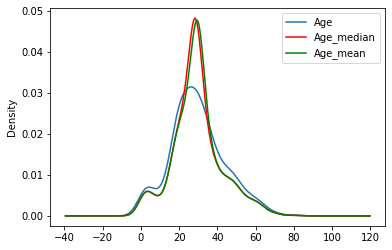

In [23]:
fig = plt.figure()
ax = fig.add_subplot(111)

# original variable distribution
X_train['Age'].plot(kind='kde', ax=ax)

# variable imputed with the median
X_train['Age_median'].plot(kind='kde', ax=ax, color='red')

# variable imputed with the mean
X_train['Age_mean'].plot(kind='kde', ax=ax, color='green')

# add legends
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

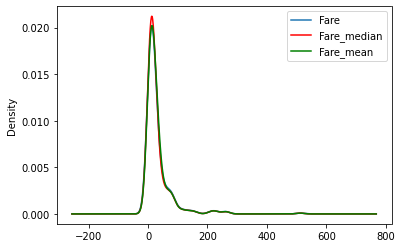

In [24]:
fig = plt.figure()
ax = fig.add_subplot(111)

# original variable distribution
X_train['Fare'].plot(kind='kde', ax=ax)

# variable imputed with the median
X_train['Fare_median'].plot(kind='kde', ax=ax, color='red')

# variable imputed with the mean
X_train['Fare_mean'].plot(kind='kde', ax=ax, color='green')

# add legends
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

In [25]:
X_train.cov()

,Age,Fare,Family,Age_median,Age_mean,Fare_median,Fare_mean
Age,201.661679,71.122334,-6.813502,201.661679,201.661679,66.792328,67.102229
Fare,71.122334,2409.254288,17.774459,58.696568,56.932203,2409.254288,2409.254288
Family,-6.813502,17.774459,2.811920,-5.452943,-5.471884,16.822188,16.824488
Age_median,201.661679,58.696568,-5.452943,162.166716,161.953332,55.269430,55.559480
Age_mean,201.661679,56.932203,-5.471884,161.953332,161.953332,53.640534,53.889413
Fare_median,66.792328,2409.254288,16.822188,55.269430,53.640534,2295.323840,2280.489642
Fare_mean,67.102229,2409.254288,16.824488,55.559480,53.889413,2280.489642,2280.489642


In [26]:
X_train.corr()

,Age,Fare,Family,Age_median,Age_mean,Fare_median,Fare_mean
Age,1.000000,0.096106,-0.318369,1.000000,1.000000,0.092765,0.093541
Fare,0.096106,1.000000,0.213368,0.093818,0.091056,1.000000,1.000000
Family,-0.318369,0.213368,1.000000,-0.255357,-0.256413,0.209391,0.210100
Age_median,1.000000,0.093818,-0.255357,1.000000,0.999342,0.090590,0.091362
Age_mean,1.000000,0.091056,-0.256413,0.999342,1.000000,0.087978,0.088674
Fare_median,0.092765,1.000000,0.209391,0.090590,0.087978,1.000000,0.996763
Fare_mean,0.093541,1.000000,0.210100,0.091362,0.088674,0.996763,1.000000


/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


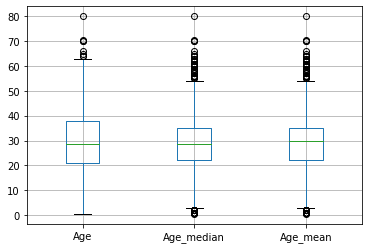

In [27]:
X_train[['Age', 'Age_median', 'Age_mean']].boxplot()

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


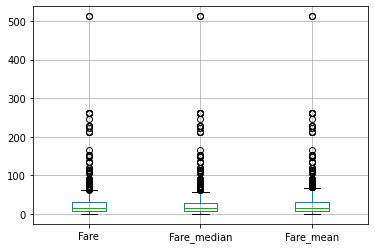

In [28]:
X_train[['Fare','Fare_median','Fare_mean']].boxplot()

In [29]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [30]:
imputer1 = SimpleImputer(strategy='median')
imputer2 = SimpleImputer(strategy='mean')

In [32]:
trf = ColumnTransformer([
    ('imputer1',imputer1,['Age']),
    ('imputer2',imputer2,['Fare'])
],remainder='passthrough')

In [33]:
trf.fit(X_train)

ColumnTransformer(remainder='passthrough',
                  transformers=[('imputer1', SimpleImputer(strategy='median'),
                                 ['Age']),
                                ('imputer2', SimpleImputer(), ['Fare'])])

In [34]:
trf.named_transformers_['imputer1'].statistics_

array([28.75])

In [35]:
trf.named_transformers_['imputer2'].statistics_

array([32.61759689])

In [36]:
X_train = trf.transform(X_train)
X_test = trf.transform(X_test)

In [37]:
X_train

array([[ 40.    ,  27.7208,   0.    ],
       [  4.    ,  16.7   ,   2.    ],
       [ 47.    ,   9.    ,   0.    ],
       ...,
       [ 71.    ,  49.5042,   0.    ],
       [ 28.75  , 221.7792,   0.    ],
       [ 28.75  ,  25.925 ,   0.    ]])